# Центральная Предельная Теорема для экспоненциального распределения

In [1]:
# Импортируем нужные библиотеки
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

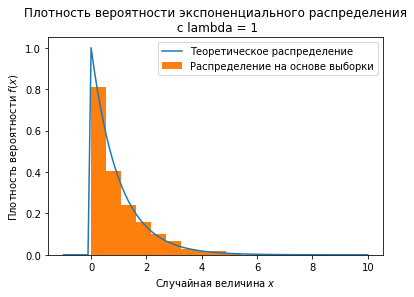

In [2]:
#Строим экспоненциальное распределение с lambda = 1  и
#генерируем из него выборку размера n = 1000
expon_distr = sts.expon
sample = expon_distr.rvs(size=1000)


#Строим функцию плотности вероятности для данного распределения (синий)
#и гистограмму на основе его выборки (оранжевый)
x = np.linspace(-1,10,100)
y = expon_distr.pdf(x)
plt.plot(x, y, label='Теоретическое распределение')
plt.hist(sample, density=True, label='Распределение на основе выборки')
plt.title('Плотность вероятности экспоненциального распределения\n c lambda = 1')
plt.ylabel('Плотность вероятности $f(x)$')
plt.xlabel('Случайная величина $x$')
plt.legend()
plt.show()

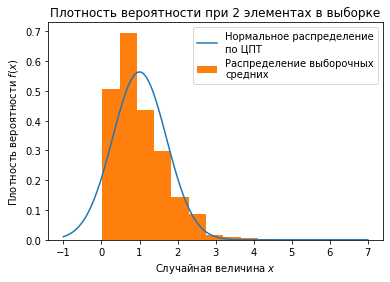

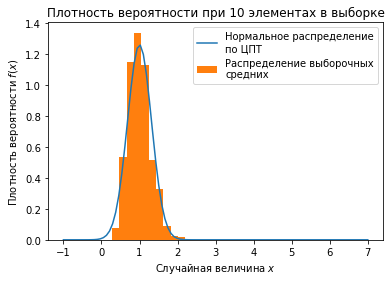

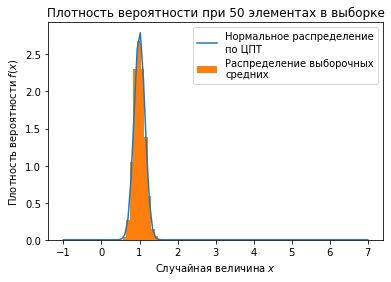

In [3]:
# Сохраняем математическое ожидание и дисперсию данного распределения
# В общем случае M = 1 / lambda,  D = 1 / lambda ** 2, 
# но мы используем lambda = 1
theory_expon_mean = 1
theory_expon_variance = 1

# Для каждого объёма выборки n посотроим гистограммы распределений
# выборочных средних
for n in [2, 10, 50]:
    sample_mean_list = []    # Здесь будут лежать выборочные средние, соответствующие одному n
    
    # Помещаем выборочные средние (всего 1000 выборок) в sample_mean_list
    for _ in range(1000):
        sample = expon_distr.rvs(size=n)
        sample_sum = 0    # переменная будет содержать сумму элементов выборки
        
        # Считаем сумму элементов выборки
        for i in range(n):
            sample_sum += sample[i]
        
        # Расчитываем выборочное среднее и добавляем его в sample_mean_list
        sample_mean = sample_sum / n
        sample_mean_list.append(sample_mean)
    
    # Вычисляем параметры нормального распределения, аппроксимирующие
    # выборочные средние при данном n
    # Считаем среднее квадратичное отклонение, а мат. ожидание
    # останется прежним (theory_expon_mean)
    clt_expon_variance = theory_expon_variance / n
    deviation = clt_expon_variance ** 0.5
    
    # Задаём аппроксимирующее нормальное распределение
    # и считаем его функцию плотности вероятности
    norm_distr = sts.norm(loc=theory_expon_mean, scale=deviation)
    norm_x = np.linspace(-1, 7, 100)
    norm_pdf = norm_distr.pdf(norm_x)
    
    # Строим аппроксимирущее нормальное распределение и гистограмму 
    # выборочных средних
    plt.plot(norm_x, norm_pdf, label='Нормальное распределение\nпо ЦПТ')
    plt.hist(sample_mean_list, density=True, label='Распределение выборочных\nсредних')
    plt.title(f'Плотность вероятности при {n} элементах в выборке')
    plt.ylabel('Плотность вероятности $f(x)$')
    plt.xlabel('Случайная величина $x$')
    plt.legend(loc='upper right')
    plt.show()
    print()
            

###### Как видно из полученных графиков, с ростом n растёт точность аппроксимации распределения выборочных средних нормальным, что является результатом работы Центральной Предельной Теоремы.
\sum_{k=1}^{\inf}{k * p(k|Я)} - \sum_{k=1}^{\inf}{k * p(k|П)} = \sum_{k=1}^{\inf}{k * (p(k|Я) - p(k|П))}
